<a href="https://colab.research.google.com/github/tgusmao/programacao_ds/blob/master/TrabalhoPratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Prático de Programação para Ciências de Dados**

Dupla: 
*   Tammy Hikari Yanai Gusmão
*   Thalita Naiara Andre Alves


Trabalho Prático para obtenção de nota na disciplina de Programação para Ciências de Dados - Turma 1 de 2020.

##Instalações e Importações Utilzadas

In [ ]:
!pip install geopandas

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from random import sample
import string
import re
import time
#import nltk
import geopandas as gpd
from tabulate import tabulate

##Importação da Base de Dados

Iniciando abaixo a leitura do arquivo CSV local (localizado no Google Drive)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_original = pd.read_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/dados-curso-completo.csv', sep = ',', skiprows = 0, encoding = 'utf-8')

In [6]:
#cópia da base original
df_copia_original = df_original.copy()

##Resumo do dataset original



A base de dados contém informações sobre tuítes sobre a COVID-19, postados durante o primeiro semestre do ano de 2020. A base foi levemente pré-processada anteriormente pelo professor da disciplina.  

In [7]:
print('Quantidade de linhas:', df_original.shape[0])
print('Quantidade de colunas:', df_original.shape[1])

Quantidade de linhas: 1658825
Quantidade de colunas: 13


Como pode ser visto acima, o atributo *shape* retornou uma tupla contendo a quantidade de linhas e colunas que constituem a base: 1.658.825 linhas e 13 colunas. 

Abaixo observamos uma tabela contendo os nomes das colunas, os tipos preponderantes em cada uma delas, e as quantidades de valores nulos e não nulos. 

In [8]:
colunas = []

for col in df_original.columns:
  colunas.append(col)

In [9]:
qntd_nulos = []
lista_nulos = df_original.isnull().sum()

for x in lista_nulos:
  qntd_nulos.append(x)

In [10]:
qntd_nao_nulos = []
lista_nao_nulos = df_original.notnull().sum()

for x in lista_nao_nulos:
  qntd_nao_nulos.append(x)

In [11]:
dados = {'colunas': colunas,
         'tipos': df_original.dtypes,
         'qntd_nulos': qntd_nulos,
         'qntd_nao_nulos': qntd_nao_nulos}

In [ ]:
resumo_dataset = pd.DataFrame (dados, columns = ['colunas','tipos', 'qntd_nulos', 'qntd_nao_nulos']).reset_index(drop=True)

In [13]:
print(tabulate(resumo_dataset, headers = 'keys', tablefmt = 'psql')) 

+----+------------+---------+--------------+------------------+
|    | colunas    | tipos   |   qntd_nulos |   qntd_nao_nulos |
|----+------------+---------+--------------+------------------|
|  0 | data       | object  |            0 |          1658825 |
|  1 | usuario    | object  |           57 |          1658768 |
|  2 | apelido    | object  |            0 |          1658825 |
|  3 | texto      | object  |            0 |          1658825 |
|  4 | retweet    | int64   |            0 |          1658825 |
|  5 | seguidores | int64   |            0 |          1658825 |
|  6 | idioma     | object  |            0 |          1658825 |
|  7 | lugar      | object  |      1584220 |            74605 |
|  8 | pais       | object  |      1584225 |            74600 |
|  9 | sigla      | object  |      1584230 |            74595 |
| 10 | latitude   | float64 |      1650105 |             8720 |
| 11 | longitude  | float64 |      1650105 |             8720 |
| 12 | hashtags   | object  |           

Os tipos de variáveis que consistem o dataframe são *object* (string), *int64* (número inteiro) e *float64* (número real). Dados relativos a data, *username*, nome de perfil, tweet, país, sigla e lugar são informações textuais. As colunas retweet e seguidores possuem dados quantitativos cujo menor valor é zero.Latitude e longitude são referentes as coordenadas geográficas, portanto, representados por números reais. 

Levando em consideração o achado acima, faz-se necessário o preenchimento apropriado para eliminar os espaços vazios presentes no dataset. Esta atividade é realizada na seção seguinte (Tratamento de Dados).

Para uma perspectiva visual da característica quantitativa dos atributos, foram plotados os gráficos a seguir:

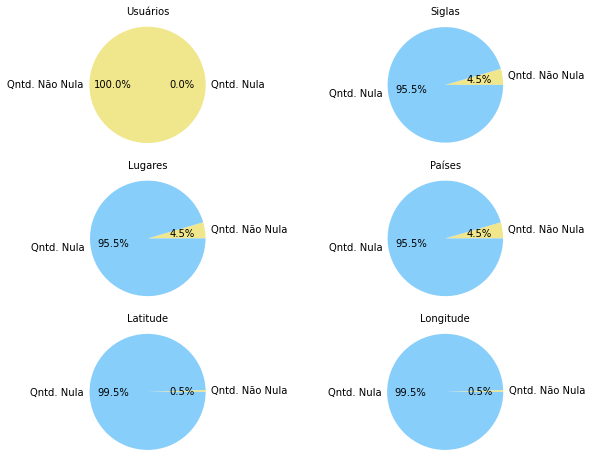

In [14]:
#Gera pie charts para quantidades nulas e não nulas para as colunas:
#usuario, sigla, lugar, pais, latitude e longitude

fig, eixos = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

eixos[0,0].pie([df_original.usuario.notnull().sum(), df_original.usuario.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[0,0].set_title('Usuários',  fontsize=10)
eixos[0,0].axis('equal')


eixos[0,1].pie([df_original.sigla.notnull().sum(), df_original.sigla.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[0,1].set_title('Siglas',  fontsize=10)
eixos[0,1].axis('equal')

eixos[1,0].pie([df_original.lugar.notnull().sum(), df_original.lugar.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[1,0].set_title('Lugares',  fontsize=10)
eixos[1,0].axis('equal')

eixos[1,1].pie([df_original.pais.notnull().sum(), df_original.pais.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[1,1].set_title('Países',  fontsize=10)
eixos[1,1].axis('equal')

eixos[2,0].pie([df_original.latitude.notnull().sum(), df_original.latitude.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[2,0].set_title('Latitude',  fontsize=10)
eixos[2,0].axis('equal')

eixos[2,1].pie([df_original.longitude.notnull().sum(), df_original.longitude.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[2,1].set_title('Longitude',  fontsize=10)
eixos[2,1].axis('equal')

# Ajusta o espaço entre os dois gráficos
plt.subplots_adjust(wspace=1)
plt.savefig('piechar_nulos_naoNulos.png')
#plt.legend(loc='lower left')
plt.show()

*idioma*, *sigla*, *pais* e *lugar* são atributos categróricos, isto é, caracterizam o tweet e/ou o usuário que postou o tweet. Como não houve restrição na coleta dedados quanto a localização e idioma, o dataset possui tweets do mundo todo como pode ser observado nas estatísticas abaixo, que apresentam os dez primeiros itens com maiores ocorrências:

In [15]:
def get_df_itens_por_coluna(df, nome_coluna):
  return df[nome_coluna].value_counts().to_frame()

In [16]:
def set_nome_coluna(df, coluna_antiga, coluna_nova):
  return df.rename(columns = {coluna_antiga:coluna_nova})

In [17]:
def calcula_df_porcentagem (df, nome_coluna, tam):
  return round(((df[nome_coluna] * 100)/tam), 2)

In [31]:
#col_principal = coluna principal
#nova_col_1 = nome da nova coluna que conterá os valores da col_principal
#nova_col_2 = nome da coluna que conterá os valores do index
#coluna4 = qualquer nome de coluna para guardar porcentagens

def organiza_itens_unicos(df, col_principal, nova_col_1, nova_col_2, coluna4 = 'porcentagem'):

  #lista = df[col_principal].value_counts().to_frame()
  lista = get_df_itens_por_coluna(df, col_principal)
  lista = set_nome_coluna(lista, col_principal, nova_col_1)
  lista[coluna4] =  calcula_df_porcentagem(lista, nova_col_1, df.shape[0])
  lista[nova_col_2] = lista.index

  return lista.reset_index(drop=True)

Em relação aos idiomas presentes, temos as seguintes colocações:

In [ ]:
#pd.pivot_table(l_idiomas,values='qntd_idioma', index=['sigla_idioma'], aggfunc = np.sum)

In [18]:
def get_item_unico_cont(_df, nome_coluna):
  unique_elements, counts_elements = np.unique(_df[nome_coluna], return_counts=True)
  df = pd.DataFrame({nome_coluna: unique_elements,
                     'qntd': counts_elements})
  return df

In [19]:
l_idiomas = get_item_unico_cont(df_original, 'idioma')
l_idiomas['porcentagem'] = calcula_df_porcentagem(l_idiomas, 'qntd', df_original.shape[0])
l_idiomas.sort_values(by = 'porcentagem', ascending = False, inplace=True) 

In [20]:
print(tabulate(l_idiomas, headers = 'keys', tablefmt = 'psql')) 

+----+----------+---------+---------------+
|    | idioma   |    qntd |   porcentagem |
|----+----------+---------+---------------|
| 41 | pt       | 1586796 |         95.66 |
| 12 | en       |   23991 |          1.45 |
| 13 | es       |   14255 |          0.86 |
| 25 | it       |    6480 |          0.39 |
| 55 | und      |    5656 |          0.34 |
|  1 | ar       |    4579 |          0.28 |
| 18 | fr       |    3656 |          0.22 |
|  4 | ca       |    2600 |          0.16 |
| 53 | tr       |    2296 |          0.14 |
| 27 | ja       |    1955 |          0.12 |
| 23 | in       |     948 |          0.06 |
| 51 | th       |     890 |          0.05 |
| 52 | tl       |     604 |          0.04 |
| 29 | ko       |     544 |          0.03 |
| 43 | ru       |     417 |          0.03 |
| 20 | hi       |     485 |          0.03 |
| 39 | pl       |     262 |          0.02 |
|  9 | de       |     361 |          0.02 |
| 16 | fa       |     258 |          0.02 |
| 36 | nl       |     208 |     

Temos 59 idiomas diferentes constituindo o dataset, sendo que a língua portuguesa é a marjoritária. Muitos idiomas tem porcentagem de 0.0% por conta da quantidade pequena (abaixo de 86 para cada) dos tweets.

In [34]:
l_siglas = organiza_itens_unicos(df_original,
                                 'sigla',
                                 'qntd_sigla',
                                 'sigla',
                                 'porcentagem')

l_siglas = l_siglas[['sigla','qntd_sigla','porcentagem']]

In [36]:
print(tabulate(l_siglas, headers = 'keys', tablefmt = 'psql')) 

+-----+---------+--------------+---------------+
|     | sigla   |   qntd_sigla |   porcentagem |
|-----+---------+--------------+---------------|
|   0 | BR      |        67247 |          4.05 |
|   1 | PT      |         2675 |          0.16 |
|   2 | US      |         1068 |          0.06 |
|   3 | IT      |          484 |          0.03 |
|   4 | ES      |          379 |          0.02 |
|   5 | GB      |          323 |          0.02 |
|   6 | FR      |          218 |          0.01 |
|   7 | AR      |          193 |          0.01 |
|   8 | MZ      |          167 |          0.01 |
|   9 | CA      |          152 |          0.01 |
|  10 | IE      |          150 |          0.01 |
|  11 | DE      |          133 |          0.01 |
|  12 | JP      |           91 |          0.01 |
|  13 | AO      |           84 |          0.01 |
|  14 | IN      |           79 |          0    |
|  15 | MX      |           76 |          0    |
|  16 | CL      |           73 |          0    |
|  17 | PY      |   

Referente as siglas, temos 120 valores únicos. Como esperado, o Brasil possui maior contagem no dataset inteiro. Nota-se que sua porcentagem é de 4.05%. O motivo já fora explicitado anteriormente: a quantidade valores nulos na coluna *sigla* é de aproximadamente 95.5%.

In [37]:
l_paises = organiza_itens_unicos(df_original,
                                 'pais',
                                 'qntd_pais',
                                 'pais',
                                 'porcentagem')

l_paises = l_paises[['pais','qntd_pais','porcentagem']]

In [39]:
print(tabulate(l_paises, headers = 'keys', tablefmt = 'psql')) 

+-----+----------------------------------+-------------+---------------+
|     | pais                             |   qntd_pais |   porcentagem |
|-----+----------------------------------+-------------+---------------|
|   0 | Brazil                           |       67247 |          4.05 |
|   1 | Portugal                         |        2675 |          0.16 |
|   2 | United States                    |        1068 |          0.06 |
|   3 | Italy                            |         484 |          0.03 |
|   4 | Spain                            |         379 |          0.02 |
|   5 | United Kingdom                   |         323 |          0.02 |
|   6 | France                           |         218 |          0.01 |
|   7 | Argentina                        |         193 |          0.01 |
|   8 | Republic of Mozambique           |         167 |          0.01 |
|   9 | Canada                           |         152 |          0.01 |
|  10 | Ireland                          |         

A respeito dos países (nomeações), temos 121 países únicos. 

In [38]:
l_lugares = organiza_itens_unicos(df_original,
                                 'lugar',
                                 'qntd_lugar',
                                 'lugar',
                                 'porcentagem')

l_lugares = l_lugares[['lugar','qntd_lugar','porcentagem']]

In [40]:
print(tabulate(l_lugares, headers = 'keys', tablefmt = 'psql'))

+------+-----------------------------------------------------------------------------------------------+--------------+---------------+
|      | lugar                                                                                         |   qntd_lugar |   porcentagem |
|------+-----------------------------------------------------------------------------------------------+--------------+---------------|
|    0 | Rio de Janeiro                                                                                |         8443 |          0.51 |
|    1 | Sao Paulo                                                                                     |         7469 |          0.45 |
|    2 | Brasília                                                                                      |         2822 |          0.17 |
|    3 | Porto Alegre                                                                                  |         1866 |          0.11 |
|    4 | Belo Horizonte                         

De lugares, 4.500 valores únicos. Elas variam de cidades, nomes de hospitais, estados, aeroportos, vilas olímpicas, etc. 

## Tratamento de Dados

De acordo com os achados apresentados anteriormente, as colunas *usuario*, *lugar*, *pais* e *sigla*. Por conta da natureza dos atributos, *latitude* e *longitude* serão mantidos como estão para uma análise posterior.

A seguir, temos o preenchimento de dados aplicados somente nas colunas *usuario*, *lugar*, *pais* e *sigla*. 

In [41]:
df_original['usuario'] = df_original['usuario'].fillna('')
df_original['lugar'] = df_original['lugar'].fillna('Não Informado')
df_original['pais'] = df_original['pais'].fillna('Não Informado')
df_original['sigla'] = df_original['sigla'].fillna('Não Informado')

Em uma busca manual, foi percebido que existem tweets em línguas estrangeiras que com o valor **pt** na coluna idioma. Abaixo podemos conferir alguns exemplos:

In [ ]:
df_original['texto', 'idioma', 'pais'].loc[[231939, 48469, 711500]]

Inicialmente foram experimentadas algumas das bibliotecas disponíveis para detecção automática de idiomas. Foram elas **langdetect**, **TextBlop** e **googletrans** (um API do Google Tradutor).

Langdetect e TextBlop apresentaram limitações quanto ao tamanho do texto (tweet) e a quantidade de requisições seguidas. Já o Google Tradutor, apesar de não ter apresentado nenhum dos impedimentos das bibliotecas mencionadas anteriormente, não se mostrou um tradutor confiável. Ademais, todas as três bibliotecas detectaram idiomas errados diversas vezes (pt -> en e vice-versa). Isto provavelmente se deve ao linguajar informal, que pode conter palavras de outros idiomas (crush, top, le, etc.) ou mesmo reduções de palavras e suas variações (q, pq, tô, to, etc.), que podem dificultar a identificação correta do idioma de um texto. 

As divergências idiomáticas podem se dar pelos seguintes fatores:
* Um país pode ter uma língua oficial, mas possui outras não oficiais.
* Um país possui mais de uma língua oficial.
* O usuário do twitter é poliglota.

Portanto, o idioma informado no dataset não é um bom indicador de localização geográfica. 

Ainda na busca manual, foi conferido que existem itens repetidos:

In [ ]:
df_original.loc[[1211517, 1231661]]

Para tanto, foi aplicada a função de remoção de linhas duplicadas:

In [ ]:
df_reduzida = pd.DataFrame.drop_duplicates(df_original)
print('Foram removidas', df_original.shape[0] - df_reduzida.shape[0], 'linhas.')
print('Quantidade atual de linhas: '+ format(df_reduzida.shape[0])+'.')

Foram removidas 2 linhas.
Quantidade atual de linhas: 1658823.


A remoção da linhas duplicadas mostra que haviam 3 tweets iguais no dataset. Somente uma delas permaneceu no dataset.

###**Métodos de Detecção de Perguntas**


Foram desevolvidas duas funções que auxiliam na aquisição de um trecho específico de um tweet, o que contém a(s) pergunta(s). Cada pergunta se torna um novo item em um novo dataframe (df_duvidas). O novo dataframe contém o índice do dataframe original (df_reduzida) e seus respectivos dados para uso posterior. Como delimitador, buscamos apenas frases que terminem com ponto de interrogação. 

In [ ]:
def get_question_by_text(text):
  questions = []
  text = text.replace('\n', ' ')

  regular_expression = '(\S[^?.!]*[?!.]*)*'
  sentences = re.split(regular_expression, text)
  for sentence in sentences:
    if not sentence.isspace() and '?' in sentence:
      questions.append(sentence)
  return questions

def extract_questions(df_reduzida):
  dic = []
  for index, row in df_reduzida.iterrows():

    questions = get_question_by_text(row['texto'])

    for question in questions:

      dic.append({'id': index, 
                  'pergunta': question,
                  'idioma': row['idioma'],
                  'data': row['data'], 
                  'apelido': row['apelido'], 
                  'retweet': row['retweet'],
                  'seguidores': row['seguidores'],
                  'lugar': row['lugar'],
                  'pais': row['pais'],
                  'sigla': row['sigla'],
                  'latitude': row['latitude'],
                  'longitude': row['longitude'],
                  'hashtags': row['hashtags']})
  
  df_questions = pd.DataFrame(dic, 
                              columns = ['id',
                                         'pergunta',
                                         'idioma',
                                         'data',
                                         'apelido',
                                         'retweet',
                                         'seguidores',
                                         'lugar',
                                         'pais',
                                         'sigla',
                                         'latitude',
                                         'longitude',
                                         'hashtags'])
  return df_questions

In [ ]:
df_duvidas = extract_questions(df_reduzida)

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


###**Classificação das Perguntas**

Os códigos das células abaixo mostarão as 50 palavras/termos mais comuns dentre os tweets. Esse mecanismo foi utilizado para auxiliar na produção de um dicionário contendo palavras-chaves que indicarão a classificação do tweet em questão. 

In [ ]:
#Adquirindo uma lista de stopword, presente no Drive compartilhado.
stopwords = set(line.strip() for line in open ('/content/drive/Shared drives/trabalhoPratico_programacaoDS/pt_stop_words.txt'))

In [ ]:
#Instanciar um dicionário onde, para cada palavra contada, a palavra (inexistente no dict).
#Se já existir, sua contagem incrementa.

wordcount = {}

for index, row in df_duvidas.iterrows():
  for word in row['pergunta'].lower().split():
      word = word.replace(".","")
      word = word.replace(",","")
      word = word.replace(":","")
      word = word.replace("\"","")
      word = word.replace("!","")
      word = word.replace("â€œ","")
      word = word.replace("â€˜","")
      word = word.replace("*","")
      word = word.replace("?","")
      word = word.replace("+","")
      if word not in stopwords:
          if word not in wordcount:
              wordcount[word] = 1
          else:
              wordcount[word] += 1

In [ ]:
#Imprime as palavras mais repetidas:
#n_print = int(input("Informar a quantidade de palavras desejada: "))
n_print = 50

print("As {} palavras mais mencionadas são as seguintes:".format(n_print))
word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

Abaixo, temos o dicionário que gerado manualmente. Sua construção também tem base em pesquisas a parte. 

In [ ]:
dict_categorias = {
'cura':'Medicamento',
'doença':'Doença',
'pandemia':'Doença',
'corona':'Doença',
'coronavírus':'Doença',
'coronavirus':'Doença',
'coronga':'Doença',
'covid-19':'Doença',
'covid19':'Doença',
'covid':'Doença',
'sars-cov-2':'Doença',
'tratamento':'Medicamento',
'curar':'Medicamento',
'cloroquina':'Medicamento',
'hidroxicloroquina':'Medicamento',
'ministro':'Pessoas',
'ministério':'Organizações',
'emissora':'Organizações',
'jornal':'Organizações',
'contra':'Medicamento',
'combate': 'Medicamento',
'especialista':'Pessoas',
'mandetta':'Pessoas',
'melhora':'Medicamento',
'sintoma':'Doença',
'sintomas':'Doença',
'caso':'Doença',
'casos':'Doença',
'vacina':'Medicamento',
'vacinas':'Medicamento',
'tamiflu':'Medicamento',
'covidao':'Doença',
'infecção': 'Doença',
'contágio':'Doença',
'atazanavir':'Medicamento',
'remdesivir':'Medicamento',
'ivermectina':'Medicamento',
'azitromicina':'Medicamento',
'who':'Organizações',
'oms':'Organizações',
'organização':'Organizações',
'organizações':'Organizações',
'coriza':'Doença',
'dor':'Doença',
'febre':'Doença',
'falta':'Doença',
'ar':'Doença',
'tosse':'Doença',
'fiocruz':'Organizações',
'fundação': 'Organizações',
'fundações': 'Organizações',
'funasa':'Organizações',
'opas':'Organizações',
'pan-americana': 'Organizações',
'teich':'Pessoas',
'etienne':'Pessoas',
'@jairbolsonaro':'Pessoas',
'bolsonaro':'Pessoas',
'@lhmandetta':'Pessoas',
'vírus':'Doença',
'virus':'Doença',
'@jdoriajr':'Pessoas',
'doria':'Pessoas',
'dória':'Pessoas',
'@bolsonarosp':'Pessoas',
'@veramagalhaes':'Pessoas',
'@minsaude':'Organizações',
'@folha':'Organizações',
'@estadao':'Organizações',
'folha':'Organizações',
'Estadão':'Organizações',
'@rodrigomaia':'Pessoas',
'@g1':'Organizações',
'g1':'Organizações',
'@teichnelson':'Pessoas',
'@wilsonwitzel':'Pessoas',
'@o_antagonista':'Pessoas',
'@cnnbrasil':'Organizações',
'@rconstantino':'Pessoas',
'@uolnoticias':'Organizações',
'ivermectina':'Medicamento',
'@osmarterra':'Pessoas',
'@carlosbolsonaro':'Pessoas',
'@bbcbrasil':'Organizações',
'trump':'Pessoas',
'uso':'Medicamento',
'mascara':'Medicamento',
'máscara':'Medicamento',
'alcool':'Medicamento',
'álcool':'Medicamento',
'gel':'Medicamento',
'70%':'Medicamento',
'combater':'Medicamento'
}

A função classificador() recebe a pergunta e cada palavra da frase é comparada aos termos existentes no dicionário. Se iguais, o retorno é a categoria respectiva da palavra. Caso não sejam iguais, a categoria devolvida é *Outro*, que pode ser definida por diversas peculiaridades (a pergunta está em outro idioma, o contexto não faz referência direta ao vírus, etc.).

In [ ]:
#Função classificadora de tuítes
#Recebe o texto do tuíte e retorna a classificação

def classificador(texto):
  t = texto.split()

  for palavra in t:
    l = len(palavra)

    if ( palavra[l-1] == '?'):
      palavra = palavra[:-1]
      
    for key, value in dict_categorias.items():
      if ( palavra.lower() == key):
        return value

  return 'Outro'

Abaixo temos o dataframe atualizado com as categorias das suas respectivas perguntas. 

In [ ]:
df_duvidas['categoria'] = df_duvidas.apply(lambda row: classificador(row['pergunta']), axis = 'columns')

##**Análise Geográfica**

In [ ]:
#Criação de um dataframe específico para análise geográfica.
df_geo = df_duvidas[['id', 'categoria', 'idioma', 'pais', 'sigla', 'lugar', 'latitude', 'longitude']].copy()

###Visão Geográfica Geral

###Visão Mapeada

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
#Devolve um dataframe filtrado com a categoria informada
#Se tiver uma coluna geometry, a função a exclue.

def get_df_geo_categoria(df, categoria):

  if ('geometry' in df):
    df.drop(['geometry'], axis=1, inplace = True)

  return df.query('categoria == @categoria')

In [ ]:
#Gera um dataframe (a partir de outro) filtrando por país específico.

def get_df_geo_pais(df, pais):
  return df.query('pais == @pais')

In [ ]:
#Função Geradora de geodataframe

def get_geodataframe(df):
  return GeoDataFrame(df, geometry = gpd.points_from_xy(df.latitude, df.longitude))

In [ ]:
#Seleção de dataframes organizados por categorias:
#Também inclui a exclusão da coluna geometry (originária do df_geo)

#Categoria Doença
df_geo_doenca = get_df_geo_categoria(df_geo, 'Doença')
#df_geo_doenca = df_geo_doenca.drop(['geometry'], axis=1)

#Categoria Medicamento
df_geo_med = get_df_geo_categoria(df_geo, 'Medicamento')
#df_geo_med = df_geo_med.drop(['geometry'], axis=1) 

#Categoria Organizações
df_geo_org = get_df_geo_categoria(df_geo, 'Organizações')
#df_geo_org = df_geo_org.drop(['geometry'], axis=1) 

#Categoria Pessoas
df_geo_pe = get_df_geo_categoria(df_geo, 'Pessoas')
#df_geo_pe = df_geo_pe.drop(['geometry'], axis=1) 

#Categoria Outro
df_geo_outro = get_df_geo_categoria(df_geo, 'Outro')
#df_geo_outro = df_geo_outro.drop(['geometry'], axis=1) 

In [ ]:
#Geração de geodataframes de cada categoria:

gdf_doenca = get_geodataframe(df_geo_doenca)

gdf_med = get_geodataframe(df_geo_med)

gdf_org = get_geodataframe(df_geo_org)

gdf_pe = get_geodataframe(df_geo_pe)

gdf_outro = get_geodataframe(df_geo_outro)

In [ ]:
#Gera gráfico de distribuição mundial das categorias das perguntas

ax = world.plot(color='white', 
                marker = 'o', 
                edgecolor='grey', 
                markersize = 20,
                figsize=(16, 10))

#ax = plt.gca()

gdf_outro.plot(ax=ax, color='brown', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

ax.set_title('Distribuição Mundial - Categorias de Perguntas',fontsize=20)
ax.axis('off')

plt.legend(loc = 'center left')
plt.savefig('geo_visao_mundial_categorias.png')
plt.show()

De acordo com o gráfico acima, verifica-se que a maior parte dos tweets foi postada por usuários que estavam no Brasil, com maior concentração nas áreas litorâneas e centro-sul. 

Ainda se nota que a Europa Ocidental e alguns territórios do continente africano também concentram uma parte significante de postagem de tweets contendo perguntas. 

No entanto, o continente africano, assim como a China, contém apenas perguntas não diretamente relacionadas com as categorias Doença, Medicamento, Organizações e Pessoas. As perguntas, então, podem envolver contextos diferentes como opiniões e visões pessoais, a quarentena e os protocolos de segurança e higiene - distanciamento social, uso de álcool gel 70%, lavar as mãos com frequência, uso de máscaras, etc.


Em resumo, podemos afirmar que a maior parte das perguntas foi realizada por usuários presentes no Brasil e as categorias de perguntas mais frequentes são, respectivamente:
1.   Doença
2.   Medicamento
3.   Organizações
4.   Pessoas


###Perguntas realizadas no Brasil

Como visto anteriormente, o Brasil concentra a maior quantidade de perguntas realizadas por usuários, além de ser o único país no mundo a ter ocorrências únicas nas categorias Organizações e Pessoas. Esta última afirmação pode se dar pela barreira idiomática, já que em algumas línguas estrangeiras (japonês, por exemplo) que não dependem do ponto de interrogação para identificar perguntas na escrita. 

####Visão Regional

In [ ]:
#Função que renderiza textos em mapas
def text(x, y, text):
    ax.text(x, y, text,
            ha='center', va='top', weight='bold', color='black')

In [ ]:
brazil_regioes = gpd.read_file('/content/drive/Shared drives/trabalhoPratico_programacaoDS/shapes/regioes_2010.shp')

In [ ]:
#df_geo_brazil = df_geo.query("(pais=='Brazil')")
df_geo_brazil = get_df_geo_pais(df, 'Brazil')

In [ ]:
#gdf_brazil = GeoDataFrame(df_geo_brazil, geometry = gpd.points_from_xy(df_geo_brazil.latitude, df_geo_brazil.longitude))
gdf_brazil = get_geodataframe(df_geo_brazil)

In [ ]:
#Gera gráfico, com divisórias regionais, da distribuição
#geográfica das categorias

ax = brazil_regioes.plot(color = 'ghostwhite',
                         linewidth=.6, 
                         marker = 'D',
                         markersize = 50,
                         edgecolor='grey',
                         figsize=(10, 8))

text(-55, 5, "NORTE")
text(-62, -17, "CENTRO-OESTE")
text(-40, -1, "NORDESTE")
text(-41, -24, "SUDESTE")
text(-49, -32, "SUL")

ax = plt.gca()

gdf_outro = get_df_geo_pais(gdf_outro, 'Brazil')
gdf_outro.plot(ax=ax, color='brown', label = 'Outro')

gdf_doenca = get_df_geo_pais(gdf_doenca, 'Brazil')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')

gdf_med = get_df_geo_pais(gdf_med, 'Brazil')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')

gdf_org = get_df_geo_pais(gdf_org, 'Brazil')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')

gdf_pe = get_df_geo_pais(gdf_pe, 'Brazil')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

ax.axis('off')

plt.legend(loc = 'upper right')

ax.set_title('Distribuição por Regiões do Brasil',fontsize=20)

plt.tight_layout()
plt.savefig('geo_visao_regional_brazil.png')

Com a visualização acima, podemos afirmar que o Sudeste é a região que tende a fazer perguntas de diversos contextos, seguido do Nordeste. 

####Visão Estadual

In [ ]:
brazil_estados = gpd.read_file('/content/drive/Shared drives/trabalhoPratico_programacaoDS/shapes/estados_2010.shp')

In [ ]:
#Gera gráfico, com divisórias estaduais, da distribuição
#geográfica das categorias

ax = brazil_estados.plot(color='ghostwhite', 
                         edgecolor='grey', 
                         marker = 'D',
                         markersize = 50,
                         figsize=(10, 8))

gdf_outro.plot(ax=ax, color='brown', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

#Colocando tags nos estados
text(-73, -11, "AC")
text(-73, -3, "AM")
text(-63, 6, "RR")
text(-65, -13, "RO")
text(-53, 4, "AP")

text(-53, -7, "PA")
text(-62, -16, "MT")
text(-60, -20, "MS")
text(-56, -25, "PR")
text(-47, -27, "SC")

text(-50, -32, "RS")
text(-43, 0, "MA")
text(-48, -11, "TO")
text(-51, -17, "GO")
text(-45, -24, "SP")

text(-44, -8, "PI")
text(-37, -14, "BA")
text(-45, -18, "MG")
text(-39, -1.5, "CE")
text(-34, -4, "RN")

text(-33, -6.5, "PB")
text(-33.5, -8, "PE")
text(-34, -9, "AL")
text(-36, -11, "SE")
text(-39, -19.5, "ES")
text(-40, -22, "RJ")
#

ax.set_title('Distribuição por Estados do Brasil',fontsize=20)
ax.axis('off')

plt.legend(loc = 'upper right')
plt.savefig('geo_visao_estadual_brazil.png')
plt.show()

Considerando a densidade demográfica populacional, temos a seguinte visualização:

In [ ]:
brazil_municipios = gpd.read_file('/content/drive/Shared drives/trabalhoPratico_programacaoDS/shapes/municipios_2010.shp')

In [ ]:
#A quantidade populacional e índices estaduais estão em formato de string.
#Casting nos valores das colunas é necessário.

brazil_municipios = brazil_municipios.astype({"populacao":'int64', "estado_id":'int64'}) 

In [ ]:
#Gera gráfico, com divisórias estaduais, 

ax = brazil_municipios.plot(color='ghostwhite', 
                         edgecolor='grey', 
                         marker = 'D',
                         markersize = 50,
                         figsize=(10, 8))

gdf_outro.plot(ax=ax, color='brown', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

#Colocando tags nos estados
text(-73, -11, "AC")
text(-73, -3, "AM")
text(-63, 6, "RR")
text(-65, -13, "RO")
text(-53, 4, "AP")

text(-53, -7, "PA")
text(-62, -16, "MT")
text(-60, -20, "MS")
text(-56, -25, "PR")
text(-47, -27, "SC")

text(-50, -32, "RS")
text(-43, 0, "MA")
text(-48, -11, "TO")
text(-51, -17, "GO")
text(-45, -24, "SP")

text(-44, -8, "PI")
text(-37, -14, "BA")
text(-45, -18, "MG")
text(-39, -1.5, "CE")
text(-34, -4, "RN")

text(-33, -6.5, "PB")
text(-33.5, -8, "PE")
text(-34, -9, "AL")
text(-36, -11, "SE")
text(-39, -19.5, "ES")
text(-40, -22, "RJ")


ax.set_title('Distribuição por  do Brasil',fontsize=20)
#ax.axis('off')

plt.legend(loc = 'upper right')
plt.savefig('geo_visao_estadual_brazil.png')
plt.show()

In [ ]:
def cont_populacao_estadual(id): #id do estado
  #populacao = []
  cont = 0
  lista = brazil_municipios[brazil_municipios['estado_id'] == id]
          #brazil_municipios[brazil_municipios['uf'] == 'AM']

  for index, row in lista.iterrows():
    cont = cont + row['populacao']

  return cont

In [ ]:
brazil_estados['populacao'] = brazil_estados.apply(lambda row: cont_populacao_estadual(row['id']), axis = 'columns')

In [ ]:
#Gera gráfico da distribuição das categorias por divisão estadual 
#em densidades demográficas populacionais.

ax = world[world.name == 'Brazil'].plot(color='white', 
                                         edgecolor='grey',
                                         figsize=(10, 8))

brazil_estados.plot(column='populacao',
           #figsize=(25, 20),
           #legend=True,
           cmap='coolwarm',
           legend=True,
           ax=ax)

gdf_outro.plot(ax=ax, color='black', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

ax.set_title('Distribuição por Municípios do Brasil',fontsize=20)
ax.axis('off')

plt.legend(loc = 'upper right')
plt.savefig('geo_visao_municipal_brazil.png')
plt.show()

##**Análise Temporal**


A respeito da relação quantidade de tweets por mês, temos o seguinte gráfico em barras:

In [ ]:
df_original['mes'] = pd.DatetimeIndex(df_original['data']).month

In [ ]:
df_tweets_mes = df_original['mes'].value_counts().to_frame()
df_tweets_mes = df_tweets_mes.rename(columns = {'mes':'qntd_mes'})
df_tweets_mes['num_mes'] = df_tweets_mes.index
df_tweets_mes.reset_index(drop=True, inplace=True)
df_tweets_mes = df_tweets_mes.sort_values(by='num_mes')

In [ ]:
def defineNomeMes(num_mes):
  if (num_mes == 1):
    return 'Janeiro'
  elif (num_mes == 2):
    return 'Fevereiro'
  elif (num_mes == 3):
    return 'Março'
  elif (num_mes == 4):
    return 'Abril'
  elif (num_mes == 5):
    return 'Maio'
  elif (num_mes == 6):
    return 'Junho'
  elif (num_mes == 7):
    return 'Julho'
  else:
    return 'outro'

In [ ]:
df_tweets_mes['nome_mes'] = df_tweets_mes.apply(lambda row: defineNomeMes(row['num_mes']), axis = 'columns')

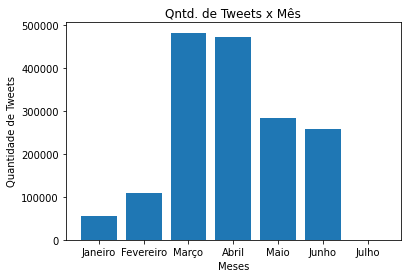

In [ ]:
#Quantidade de Tweets x mês

plt.bar(df_tweets_mes.nome_mes, df_tweets_mes.qntd_mes)
plt.title('Qntd. de Tweets x Mês')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Tweets')
plt.savefig('qntd_tweets_por_mes_df_original.png')
plt.show()

No gráfico acima, podemos observar que:

*   Conforme a COVID-19 é espalhada no exterior a quantidade de tweets sobre o assunto aumenta.
*   Chega ao pico no mês de março, onde diversas metrópoles começam a anunciar casos suspeitos e confirmados. 
*   Em abril ainda temos um número alto de postagens. Trata-se do período em que cidades iniciam o período de quarentena e reforçam mensagens do protocolo de distanciamento social e higiene. 
*   No mês seguinte, há uma queda de aproximadamente 39,68%. Pode-se supor que a queda se dá pela transferência da menção textual ao vírus para menções audiovisuais (memes e vídeos, por exemplo), abordagens indiretas referentes a pandemia, quarentena e pelo emprego dos protocolos de higiene e distantiamento social estipulados mundialmente. 

### Definição dos dataframes


BRAINSTORM
*   Agrupar por dia
*   Agrupar por periodo do dia (dia, tarde, noite)
*   buscar as datas dos pronunciamento do bolsonaro
*   Agrupar por categoria




In [ ]:
#  dataframe
df_copy = df_copia_original.copy() #df_reduzida
df_duvidas_copy = df_duvidas.copy()

In [ ]:
# convert coluna data de object para datatime
# pd.to_datetime(pd.Series(['05/23/2005']))
df_copy.data= pd.to_datetime(df_copy.data)
df_duvidas_copy.data= pd.to_datetime(df_duvidas_copy.data)

### Dataframe geral

In [ ]:
# Transformando o datetime em index
df_copy.set_index('data', inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1658825 entries, 2020-03-23 18:51:14 to 2020-06-02 16:04:51
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   usuario     1658768 non-null  object 
 1   apelido     1658825 non-null  object 
 2   texto       1658825 non-null  object 
 3   retweet     1658825 non-null  int64  
 4   seguidores  1658825 non-null  int64  
 5   idioma      1658825 non-null  object 
 6   lugar       74605 non-null    object 
 7   pais        74600 non-null    object 
 8   sigla       74595 non-null    object 
 9   latitude    8720 non-null     float64
 10  longitude   8720 non-null     float64
 11  hashtags    1658825 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 164.5+ MB


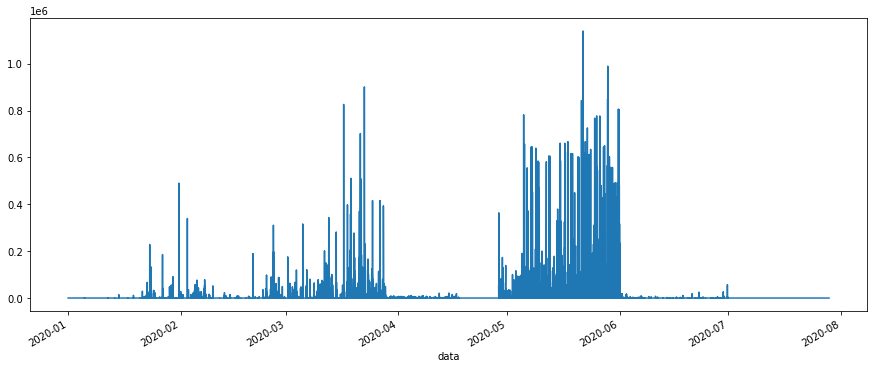

In [ ]:
df_copy.retweet.plot(figsize=(15, 6))

### Dataframe Perguntas

In [ ]:
# Método para agrupar os dataframes por cada categoria
#  h → hora | d → dia
def count_categoria_por_dia(df, categoria, f_floor='d'):
  df = df_duvidas_copy.loc[df_duvidas_copy['categoria'] == categoria].copy()
  df[['data', 'categoria']].groupby(['data', 'categoria']).count()

  df = (pd.to_datetime(df_outro['data'])
        .dt.floor(f_floor)
        .value_counts()
        .rename_axis('date')
        .reset_index(name='count'))

  df.date = pd.to_datetime(df.date)
  return df

df1 = count_categoria_por_dia(df_duvidas_copy, 'Medicamento')
df2 = count_categoria_por_dia(df_duvidas_copy, 'Doença')
# categorias = ['Medicamento', 'Doença', 'Pessoas', 'Organizações', 'Outro']

plt.bar(df1['date'], df1['count'], label='Medicamento', color='r')
plt.bar(df2['date'], df2['count'], label='Doença', color='b')

plt.legend()

plt.xlabel('Datas')
plt.ylabel('Quantidade por categoria')

plt.title = 'Thalita teste'

plt.show()

NameError: ignored